# Perform a meta-analysis

The replication and update of the meta-analysis is performed thanks to a Python Package. All values required to perform the meta-analysis are stored in a csv file. All csv files used in *Bussalb et al.* are available:
1. for the replication with our choices: 
   * *values_total_meta_analysis_cortese.csv*, 
   * *values_inattention_meta_analysis_cortese.csv*, 
   * *values_hyperactivity_meta_analysis_cortese.csv*;
2. for the update: 
   * *values_total_meta_analysis.csv*, 
   * *values_inattention_meta_analysis.csv*, 
   * *values_hyperactivity_meta_analysis.csv*;
3. for the subgroup analysis: 
   * standard protocol: 
     * *values_total_meta_analysis_sd.csv*, 
     * *values_inattention_meta_analysis_sd.csv*, 
     * *values_hyperactivity_meta_analysis_sd.csv*;   
   * low/no medication: 
     * *values_total_meta_analysis_wm.csv*, 
     * *values_inattention_meta_analysis_wm.csv*,
     * *values_hyperactivity_meta_analysis_wm.csv*.

Meta-analysis can be run for three outcomes: total, inattention and hyperactivity.

## Import raw data

The name of the csv file to import must be modified according to the outcome we want to study. If you had not installed the ```source_assess_treatment_efficacy``` package (see ```README.md```), do not forget to uncomment and change the path given in ```sys.path.append``` (it corresponds to the root path, where the ```source_assess_treatment_efficacy``` package is) and make sure to fulfill the requirements specified in ```requirements.txt```.

In [9]:
import numpy as np
import scipy.stats as scp
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from IPython.display import display
import sys

# Add the path where the packages are
# sys.path.append(r"C:\Users\Aurore Bussalb\Desktop\meta-analysis-statistical-tools")
import source_assess_treatment_efficacy.meta_analysis.import_csv_for_meta_analysis as icm
import source_assess_treatment_efficacy.meta_analysis.perform_meta_analysis as pma

%matplotlib inline

# Import data from a csv file
df_parents, df_teachers, df_clinicians = icm.import_csv(r"data-replication\values_total_meta_analysis_cortese.csv")

## Run the meta-analysis

If you want to run the meta-analysis on parents assessments put ```df_parents``` as ```run_meta_analysis``` first argument, otherwise put ```df_teachers```. For more information, see the documentation of that function in ```documentation\package-documentation```.

In [10]:
# Results per study
df_results_per_study, df_results = pma.run_meta_analysis(df_parents)
display(df_results_per_study)

,Year,Effect size,Standard Error of the ES,95% Confidence interval of the ES,Weight
Author,,,,,
Bakhshayesh,2011,-0.904992,0.417849,"(-1.7239760805818745, -0.08600804807978091)",6.456554
Beauregard,2006,-1.199237,0.692655,"(-2.5568406143558624, 0.15836731961650496)",3.118709
Bink,2014,0.033536,0.250058,"(-0.4565771606266108, 0.523648508270089)",10.637426
Gevenlesben,2009,-0.564512,0.231546,"(-1.0183428257121006, -0.11068054575646136)",11.215132
Maurizio,2014,-0.375000,0.434640,"(-1.2268940686925252, 0.47689406869252493)",6.147927
Holtmann,2009,0.400000,0.374420,"(-0.33386356588492205, 1.1338635658849219)",7.342575
Steiner2014,2014,-0.681376,0.270169,"(-1.2109081827220218, -0.15184446757327408)",10.031014
VanDongen,2013,0.136431,0.323101,"(-0.4968464180242921, 0.7697092451366682)",8.565444
Arnold,2013,0.260080,0.354744,"(-0.43521797166151943, 0.9553782619616531)",7.788230


The effect size between subject is computed for each study as long with its standard error and its 95% confidence interval. The weight associated to each study is displayed too. A negative effect size is in favor of Neurofeedback.

In [11]:
# Results of the meta-analysis
display(df_results)

,Chi2,p-value Heterogeneity,Tau2,Summary Effect,Variance Summary Effect,Standard Error Summary Effect,95% Confidence Interval of the Summary Effect,p-value,Heterogeneity
Results,24.704346,0.016288,0.11054,-0.26449,0.01841,0.135684,"(-0.530429810169585, 0.001450662721699636)",0.051259,51.42555


Results of the meta-analysis are presented here. A negative summary effect is in favor of Neurofeedback.

## Display the forest plot

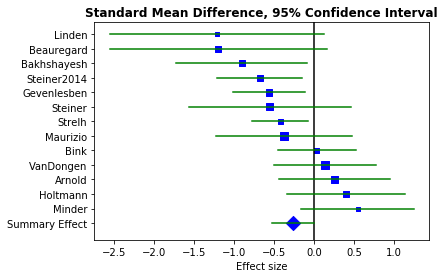

In [12]:
forest_plot = pma.forest_plot(df_results_per_study, df_results)

Negative effect sizes are in favor of Neurofeedback. Effects size are represented by a blue square whose size is propotional to the weight of the study. 95% confidence interval are displayed in green. The summary effect corresponds to the blue diamond.